In [1]:
%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# The special thing about time series is that data points relate to one another...they are not independent
So we can to compare them and relate them. One way to do this is to look at how they change. For example, we can 'difference' a time series

In [4]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'H', periods = 20))
ts_lagged = ts.shift(5)

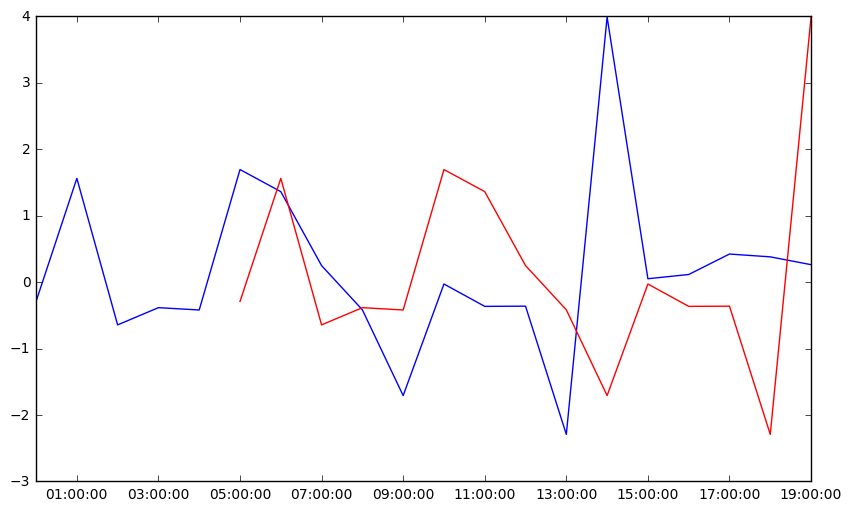

In [5]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

### Query: how can I shift my time series 'into the future' instead of into the past?

In [6]:
# %load snippets/shift_future.py
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'H', periods = 20))
ts_lagged = ts.shift(-5)

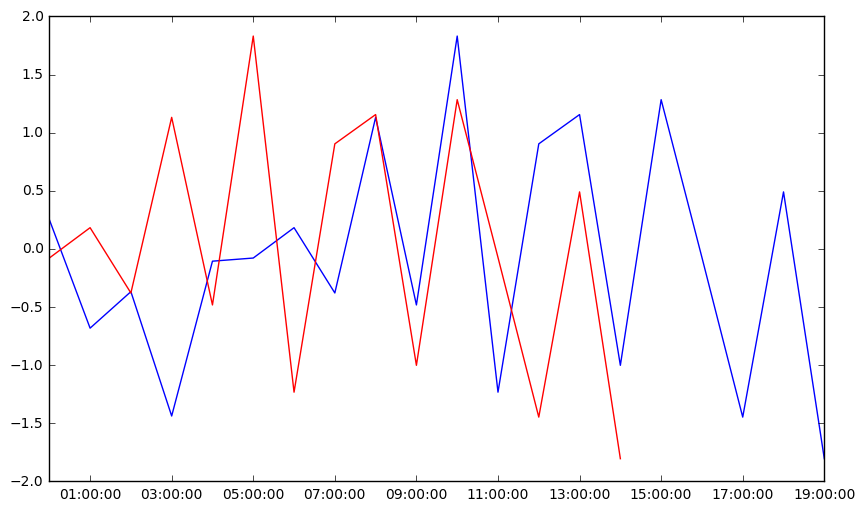

In [7]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

# Window functions give you moving aggregate measures of a time series

In [9]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample()

In [8]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])

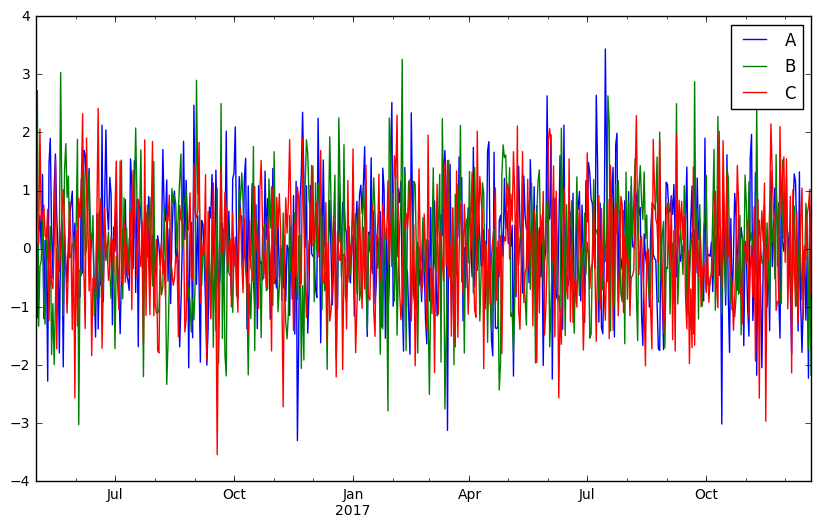

In [9]:
df.plot()

In [10]:
df.index

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08',
               '2016-05-09', '2016-05-10',
               ...
               '2017-12-12', '2017-12-13', '2017-12-14', '2017-12-15',
               '2017-12-16', '2017-12-17', '2017-12-18', '2017-12-19',
               '2017-12-20', '2017-12-21'],
              dtype='datetime64[ns]', length=600, freq='D')

In [11]:
r = df.rolling(window = 20)
r

Rolling [window=20,center=False,axis=0]

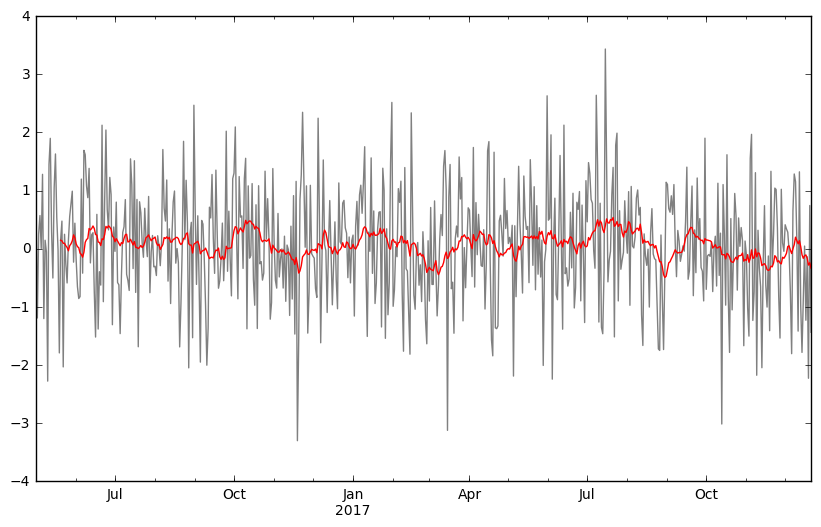

In [12]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red')

### Try out some of these options with .rolling()

r.agg, r.apply, r.count, r.max, r.median, r.name, r.quantile, r.kurt, 
r.aggregate, r.std, r.skew, r.sum, r.var

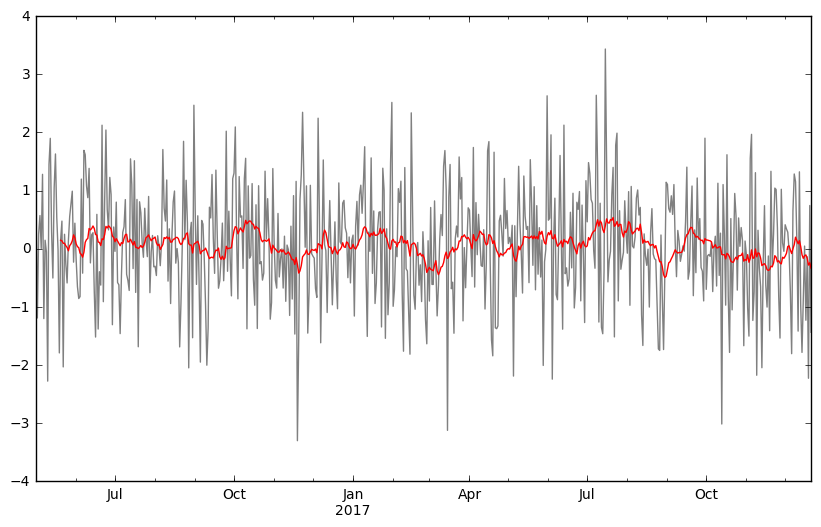

In [13]:
df['A'].plot(color = 'gray')
r.agg(np.mean)['A'].plot(color = 'red')

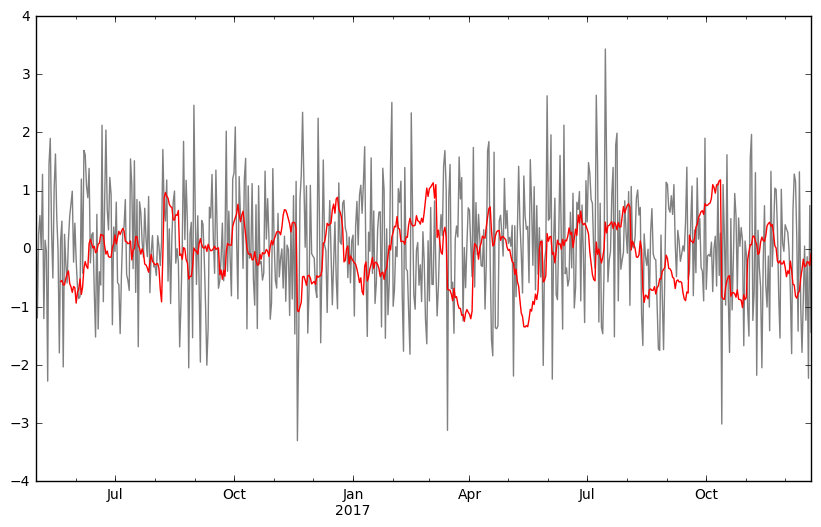

In [14]:
df['A'].plot(color = 'gray')
r.skew()['A'].plot(color = 'red')

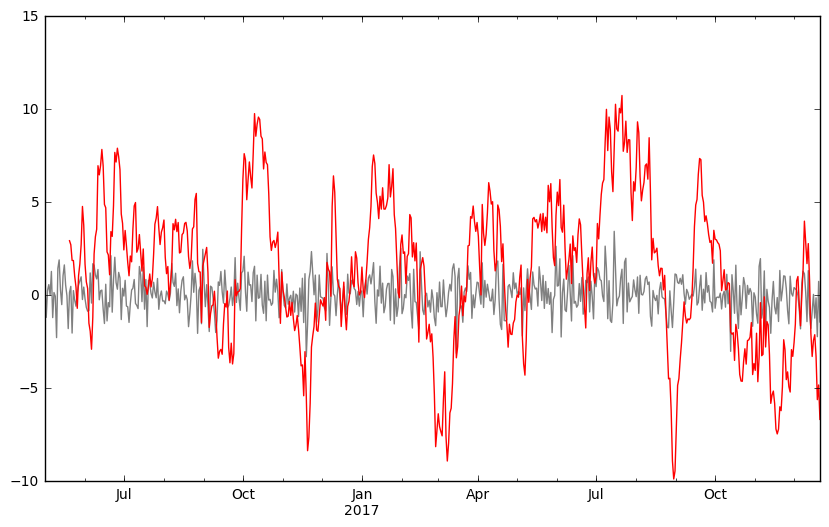

In [16]:
df['A'].plot(color = 'gray')
r.sum()['A'].plot(color = 'red')

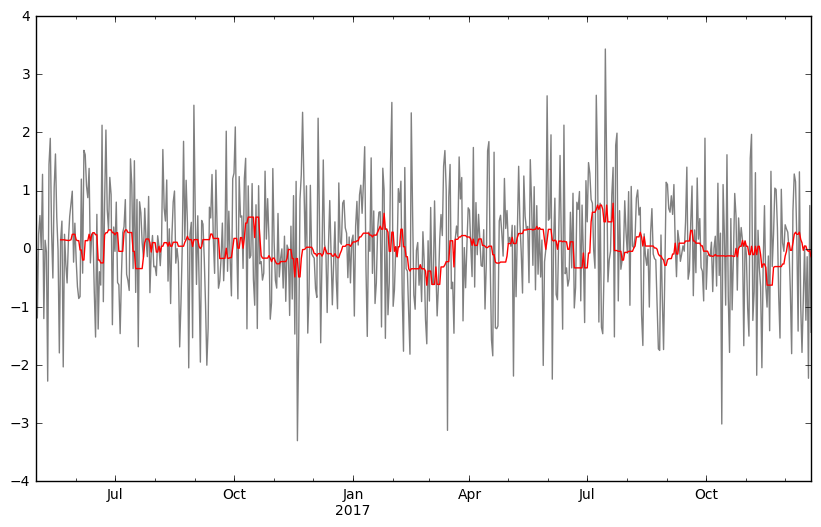

In [19]:
df['A'].plot(color = 'gray')
r.quantile(0.5)['A'].plot(color = 'red')

### What about a custom function?

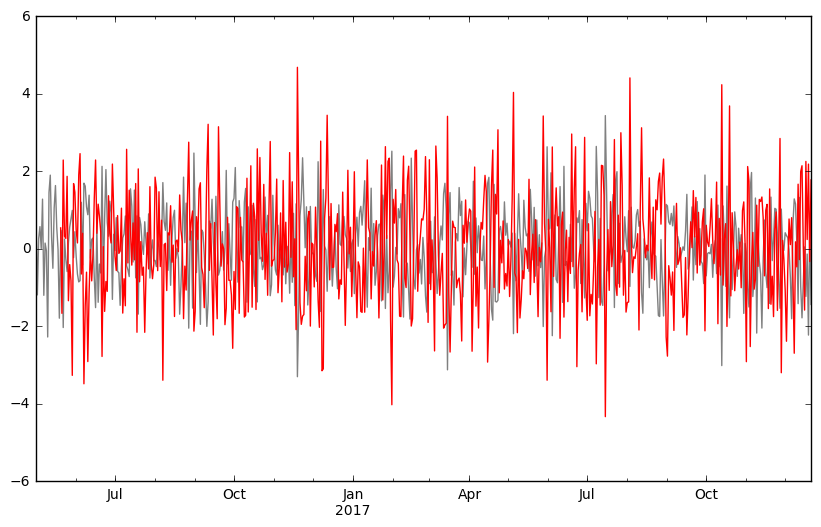

In [22]:
# %load snippets/custom_rolling.py
df['A'].plot(color = 'gray')
r.apply(lambda x : x[0] - x[-1])['A'].plot(color = 'red')

In [ ]:
df['A'].plot(color = 'gray')
r.apply(lambda x : )['A'].plot(color = 'red')

### What if I want to generate a rolling window function of monthly data from daily data?

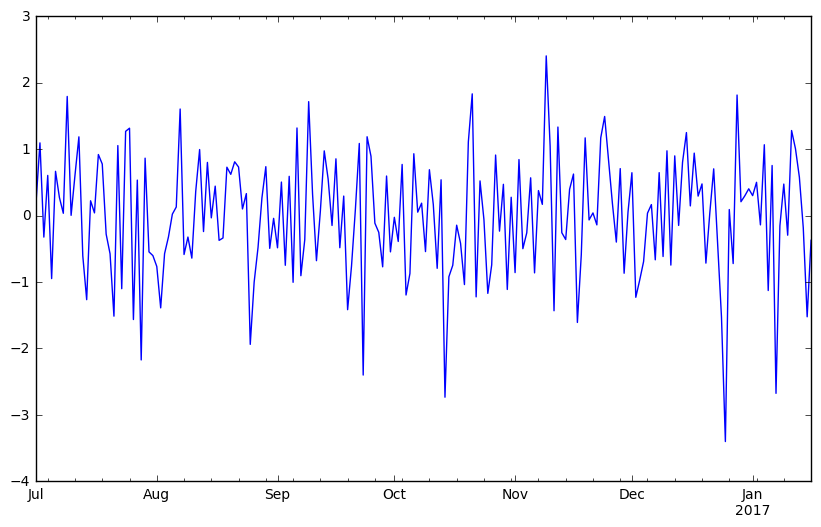

In [30]:
# %load snippets/resample_rolling.py
ts_long = pd.Series(np.random.randn(200), pd.date_range('7/1/16', freq = 'D', periods = 200))
ts_long.plot()

In [29]:
ts_long.resample('M').mean().head()

2016-07-31   -0.086602
2016-08-31   -0.159286
2016-09-30    0.183474
2016-10-31   -0.105803
2016-11-30    0.036264
Freq: M, dtype: float64

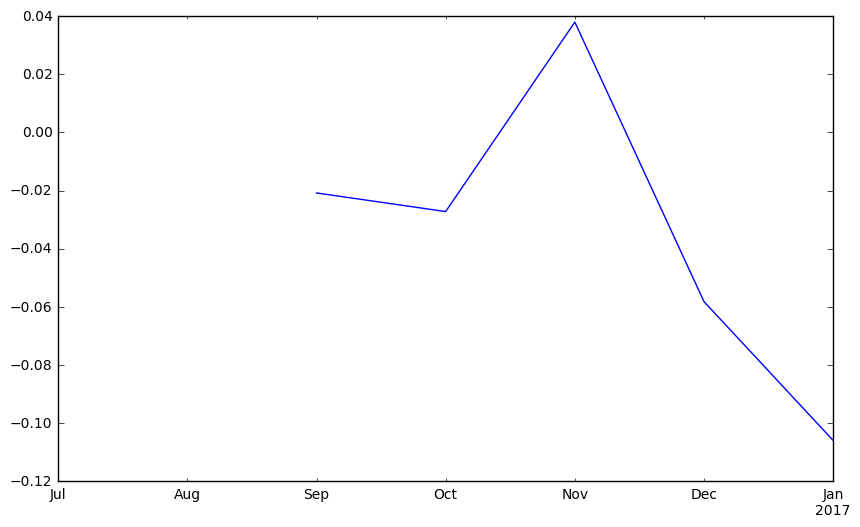

In [27]:
ts_long.resample('M').mean().rolling(window = 3).mean().plot()

## Expanding windows

In [35]:
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-05-02,-0.249961,1.039408,-0.848660
2016-05-03,-0.081201,0.248548,-0.531153
2016-05-04,0.081799,0.111005,0.116528
2016-05-05,0.066405,0.046730,0.189761


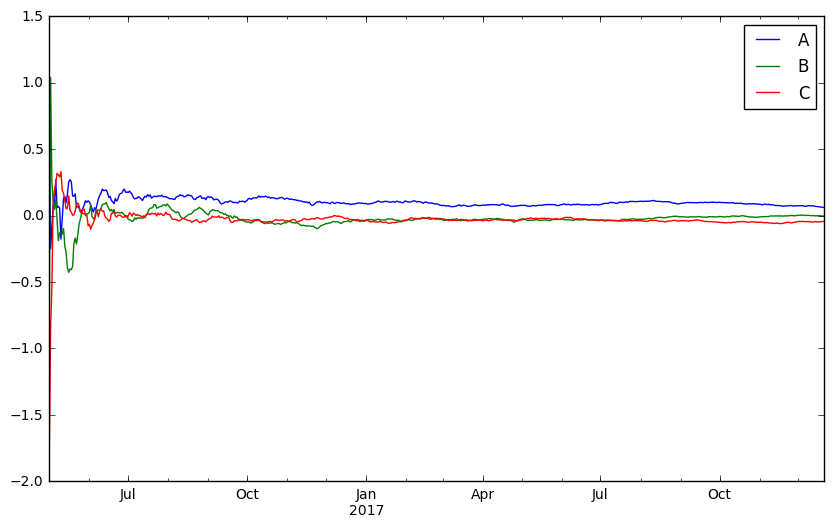

In [32]:
df.expanding(min_periods = 1).mean().plot()

# Try

(1) How can you perform an exponentially weight moving average rather than a window function? (hint: look for ewma + pandas docs)

(2) When would you use an expanding window vs. a rolling window?

(3) Write a custom function to repace .quantile(.5) function for a moving average

(4) How would you compute more than one aggregation function on a moving window function at the same time? 

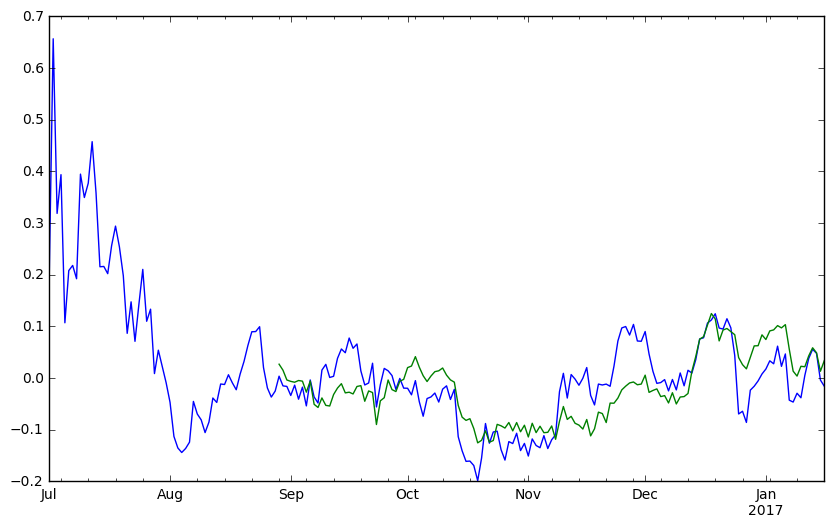

In [37]:
# %load snippets/window_funcs_try.py
#1
ts_long.ewm(span=60, freq = 'D', min_periods = 0, adjust = True).mean().plot()
ts_long.rolling(window = 60).mean().plot()

###  #2
If you are adding new elements and old ones are still important and active, then you need expanded window.
For, example in diabetes monitoring you need to keep and use previous data.

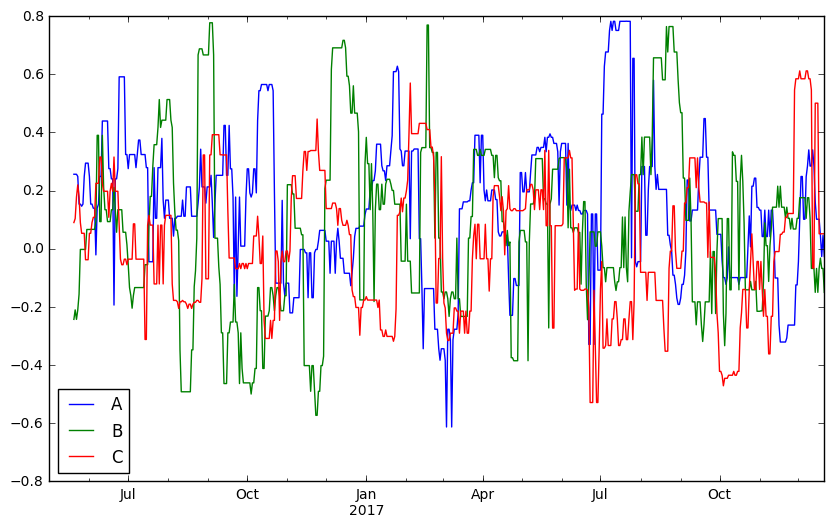

In [42]:
#3
r = df.rolling(window = 20)
r.apply(lambda x: sorted(x)[int(round(len(x)*0.5))]).plot()

In [45]:
#4 
r = df.rolling(window = 20)
r.agg(['sum', 'count']).head()

A         B         C      
           sum count sum count sum count
2016-05-01 NaN   1.0 NaN   1.0 NaN   1.0
2016-05-02 NaN   2.0 NaN   2.0 NaN   2.0
2016-05-03 NaN   3.0 NaN   3.0 NaN   3.0
2016-05-04 NaN   4.0 NaN   4.0 NaN   4.0
2016-05-05 NaN   5.0 NaN   5.0 NaN   5.0